In [22]:
# 数据准备
import logging
logging.getLogger().setLevel(logging.INFO)
import mxnet as mx
import numpy as np

fname = mx.test_utils.download('http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data')
data = np.genfromtxt(fname, delimiter=',')[:,1:]
label = np.array([ord(l.split(',')[0])-ord('A') for l in open(fname, 'r')])

batch_size = 32
ntrain = int(data.shape[0]*0.8)
train_iter = mx.io.NDArrayIter(data[:ntrain, :], label[:ntrain], batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(data[ntrain:, :], label[ntrain:], batch_size)




INFO:root:letter-recognition.data exists, skipping download


aaa
[[
[[  4.  10.   6.   7.   9.   9.   6.   4.   3.   6.   7.   7.   9.   8.
    5.   6.]
 [  6.   9.   8.   4.   3.   8.   7.   3.   4.  13.   5.   8.   6.   8.
    0.   8.]
 [  6.   9.   8.   8.  10.   7.   7.   5.   4.   7.   6.   8.   7.   9.
    7.  10.]
 [  5.   6.   6.   4.   3.   7.   6.   2.   7.   7.   6.   9.   0.   9.
    4.   8.]
 [  5.   9.   7.   6.   4.   9.   7.   3.   5.  10.   4.   6.   5.   8.
    1.   7.]
 [  5.   8.   8.   6.   6.   5.   8.   3.   6.  10.   8.   8.   4.   8.
    4.   6.]
 [  0.   0.   1.   0.   0.   5.   7.   5.   6.   7.   6.  12.   0.   8.
    6.  10.]
 [  1.   0.   2.   0.   0.   7.  10.   3.   1.   7.  12.   8.   1.  11.
    0.   8.]
 [  5.   9.   7.   7.   5.   6.   7.   7.   5.   5.   6.  11.   4.   8.
    4.   8.]
 [  2.   4.   4.   3.   2.   7.   8.   2.   8.  11.   7.   9.   2.   8.
    4.   8.]
 [  5.   4.   5.   6.   2.   7.   7.  15.   2.   4.   6.   8.   6.   8.
    0.   8.]
 [  1.   3.   2.   1.   1.   8.   7.   3.   4.  10.   5.  

[[
[[  5.   6.   5.   8.   4.   7.   7.  12.   2.   7.   9.   8.   8.   6.
    0.   8.]
 [  6.  12.   6.   6.   3.   8.   7.   4.   3.  13.   8.   8.   3.  10.
    3.   8.]
 [  4.   6.   4.   4.   1.   7.   5.  13.   5.   7.  15.   8.   3.   9.
    0.   8.]
 [  2.   7.   3.   5.   2.   4.   4.   4.   7.   2.   1.   6.   1.   6.
    1.   6.]
 [  6.  11.   9.   8.   7.   7.   8.   5.   7.   7.   5.   6.   3.   6.
    6.   9.]
 [  4.   7.   6.   6.   6.   7.   8.   5.   6.   6.   4.   7.   4.   7.
    7.   5.]
 [  5.   9.   8.   7.   4.   8.   7.   1.   8.  10.   4.   7.   3.   8.
    4.   8.]
 [  2.   3.   4.   4.   1.   5.   8.   4.   2.   8.  13.   8.   3.  10.
    0.   8.]
 [  2.   2.   3.   3.   2.   8.   7.   6.   6.   7.   6.   8.   6.   8.
    3.   7.]
 [  3.   5.   6.   4.   5.   8.   7.   3.   4.   8.   5.   7.   6.   9.
    5.   5.]
 [  3.   6.   3.   4.   2.   8.   6.  11.   1.   6.   9.   8.   7.   6.
    0.   8.]
 [  3.   7.   4.   5.   2.   6.   3.   1.   8.   8.   2.  11. 

[[
[[  6.   9.   8.   8.   7.   5.   4.   4.   4.   4.   3.   7.   4.   8.
    6.   5.]
 [  4.   9.   6.   7.   3.   6.  12.   3.   4.   8.  12.   8.   3.  10.
    1.   9.]
 [  7.  11.   5.   6.   3.   7.   3.   2.   5.   7.   2.   7.   3.   7.
    5.   9.]
 [  5.   7.   7.   5.   5.  10.   6.   3.   7.  11.   3.   6.   4.   6.
    6.  11.]
 [  2.   0.   2.   1.   0.   8.   5.  11.   4.   7.  13.   8.   3.  10.
    0.   8.]
 [  8.  10.   8.   6.   3.   4.   7.   5.   7.   9.  12.  12.   6.  11.
    3.   6.]
 [  6.   9.   9.   7.   9.   6.   8.   1.   5.  10.   8.   7.   8.   9.
    4.   6.]
 [  6.  10.   7.   7.   5.   5.   7.   6.   5.   9.   8.  11.   2.   8.
    4.  10.]
 [  3.   4.   4.   5.   3.   8.   8.   6.   2.   8.   6.   9.   2.   9.
    3.   8.]
 [  4.   7.   5.   8.   6.   7.   9.   5.   4.   8.   6.   7.   4.   9.
    8.   7.]
 [  8.  14.   7.   8.   4.   8.   8.   4.   6.   8.   5.   6.   6.   8.
    5.   8.]
 [  3.  10.   4.   8.   3.   6.   8.   0.   7.  13.   7.   8. 

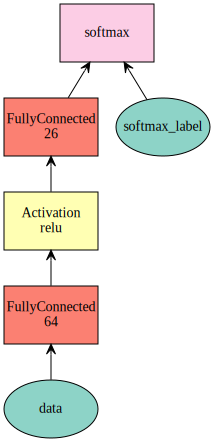

In [4]:
# 定义网络
net = mx.sym.Variable('data')
net = mx.sym.FullyConnected(net, name='fc1', num_hidden=64)
net = mx.sym.Activation(net, name='relu1', act_type="relu")
net = mx.sym.FullyConnected(net, name='fc2', num_hidden=26)
net = mx.sym.SoftmaxOutput(net, name='softmax')
mx.viz.plot_network(net)

In [5]:
# 创建模型
mod = mx.mod.Module(symbol=net,
                    context=mx.cpu(),
                    data_names=['data'],
                    label_names=['softmax_label'])

In [6]:
# 中间层接口
# allocate memory given the input data and label shapes
mod.bind(data_shapes=train_iter.provide_data, label_shapes=train_iter.provide_label)
# initialize parameters by uniform random numbers
mod.init_params(initializer=mx.init.Uniform(scale=.1))
# use SGD with learning rate 0.1 to train
mod.init_optimizer(optimizer='sgd', optimizer_params=(('learning_rate', 0.1), ))
# use accuracy as the metric
metric = mx.metric.create('acc')
# train 5 epochs, i.e. going over the data iter one pass
for epoch in range(5):
    train_iter.reset()
    metric.reset()
    for batch in train_iter:
        mod.forward(batch, is_train=True)       # compute predictions
        mod.update_metric(metric, batch.label)  # accumulate prediction accuracy
        mod.backward()                          # compute gradients
        mod.update()                            # update parameters
    print('Epoch %d, Training %s' % (epoch, metric.get()))


Epoch 0, Training ('accuracy', 0.44824999999999998)
Epoch 1, Training ('accuracy', 0.65125)
Epoch 2, Training ('accuracy', 0.70537499999999997)
Epoch 3, Training ('accuracy', 0.74131250000000004)
Epoch 4, Training ('accuracy', 0.76568749999999997)


In [8]:
# 模型训练
# reset train_iter to the beginning
train_iter.reset()

# create a module
mod = mx.mod.Module(symbol=net,
                    context=mx.cpu(),
                    data_names=['data'],
                    label_names=['softmax_label'])

# fit the module
mod.fit(train_iter,
        eval_data=val_iter,
        optimizer='sgd',
        optimizer_params={'learning_rate':0.1},
        eval_metric='acc',
        num_epoch=8)

INFO:root:Epoch[0] Train-accuracy=0.359312
INFO:root:Epoch[0] Time cost=0.252
INFO:root:Epoch[0] Validation-accuracy=0.581250
INFO:root:Epoch[1] Train-accuracy=0.620437
INFO:root:Epoch[1] Time cost=0.247
INFO:root:Epoch[1] Validation-accuracy=0.658500
INFO:root:Epoch[2] Train-accuracy=0.686625
INFO:root:Epoch[2] Time cost=0.235
INFO:root:Epoch[2] Validation-accuracy=0.706000
INFO:root:Epoch[3] Train-accuracy=0.728500
INFO:root:Epoch[3] Time cost=0.212
INFO:root:Epoch[3] Validation-accuracy=0.710500
INFO:root:Epoch[4] Train-accuracy=0.754125
INFO:root:Epoch[4] Time cost=0.221
INFO:root:Epoch[4] Validation-accuracy=0.744750
INFO:root:Epoch[5] Train-accuracy=0.768375
INFO:root:Epoch[5] Time cost=0.229
INFO:root:Epoch[5] Validation-accuracy=0.757500
INFO:root:Epoch[6] Train-accuracy=0.785750
INFO:root:Epoch[6] Time cost=0.200
INFO:root:Epoch[6] Validation-accuracy=0.786000
INFO:root:Epoch[7] Train-accuracy=0.795250
INFO:root:Epoch[7] Time cost=0.293
INFO:root:Epoch[7] Validation-accuracy=0

In [30]:
# 模型预测与评估
y = mod.predict(val_iter)
assert y.shape == (4000, 26)
score = mod.score(val_iter, ['acc'])
print("Accuracy score is %f" % (score[0][1]))

[('accuracy', 0.79025000000000001)]
Accuracy score is 0.790250


aaa
